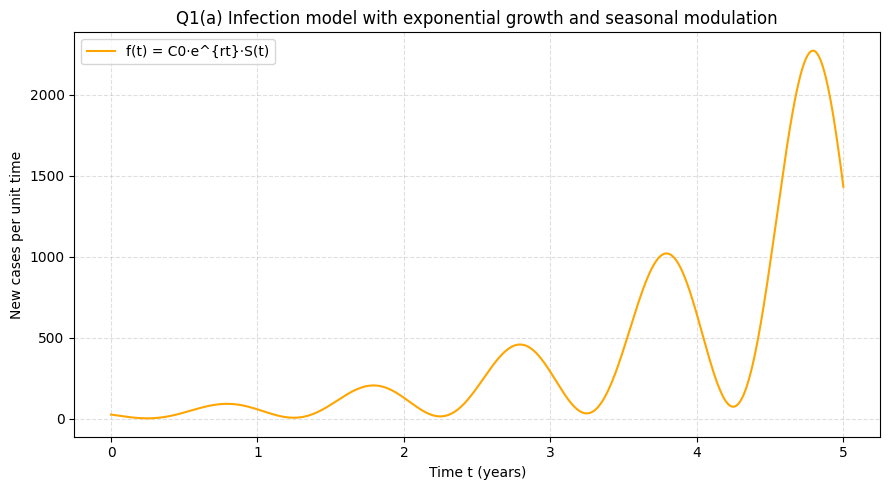

In [6]:
# Q1 Modeling & Plots (Infection and Wildfires)
import numpy as np
import matplotlib.pyplot as plt

# ---------- Q1(a): Infection model ----------
# Time in years; t=0 corresponds to Jan 1 of some year.
t_a = np.linspace(0, 5, 1000)  # 5 years

# Parameters for infection model
C0 = 50          # initial new cases per time unit
r = 0.8          # exponential growth rate per year (summer drives growth)
alpha = 0.9      # seasonal amplitude (close to 1 for strong seasonality)
phi_summer = 0.5 # shift so that peaks occur mid-year (around summer)

# Seasonal factor in [sigma, 1]; sigma small => near-zero winters
sigma = 0.05
season_a = sigma + (1 - sigma) * (1 + np.sin(2 * np.pi * (t_a - phi_summer))) / 2

f_a = C0 * np.exp(r * t_a) * season_a

plt.figure(figsize=(9, 5))
plt.plot(t_a, f_a, label="f(t) = C0·e^{rt}·S(t)", color='orange')
plt.xlabel("Time t (years)")
plt.ylabel("New cases per unit time")
plt.title("Q1(a) Infection model with exponential growth and seasonal modulation")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()




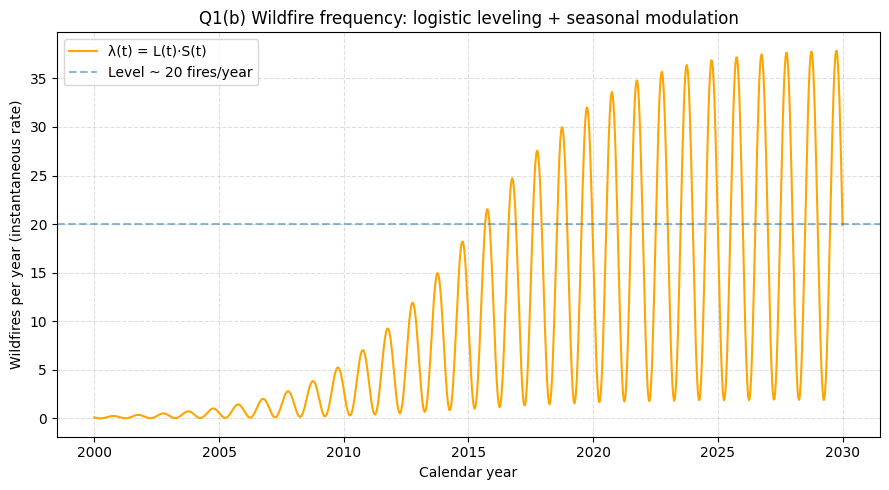

In [2]:
# ---------- Q1(b): Wildfire frequency model ----------
# Time in years since 2000; t=0 => year 2000
t_b = np.linspace(0, 30, 1000)  # 2000–2030 for context

# Logistic long-term trend leveling at K ≈ 20 fires/year
K = 20          # carrying capacity (leveling frequency)
k = 0.35        # logistic growth steepness
t0 = 15         # midpoint year (2000 + 15 = 2015)
L = K / (1 + np.exp(-k * (t_b - t0)))  # long-term average frequency

# Seasonal factor with mean 1 but near-zero winters
tau = 0.05  # winter floor (near zero)
season_raw = tau + (1 - tau) * (1 + np.sin(2 * np.pi * (t_b - phi_summer))) / 2
season_mean = (1 + tau) / 2  # mean of season_raw
season_b = season_raw / season_mean  # renormalize to mean 1

lambda_b = L * season_b  # instantaneous frequency per unit time

plt.figure(figsize=(9, 5))
plt.plot(t_b + 2000, lambda_b, label="λ(t) = L(t)·S(t)", color="orange")
plt.axhline(K, linestyle='--', alpha=0.5, label="Level ~ 20 fires/year")
plt.xlabel("Calendar year")
plt.ylabel("Wildfires per year (instantaneous rate)")
plt.title("Q1(b) Wildfire frequency: logistic leveling + seasonal modulation")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


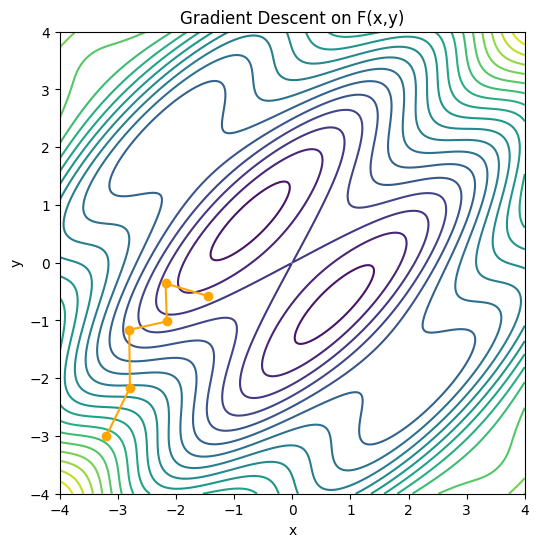

[(-3.2, -3.0),
 (-2.7936510053851906, -2.1663489946148093),
 (-2.805176588731962, -1.1628234112680378),
 (-2.158565868931359, -1.015834131068641),
 (-2.1800395485475876, -0.35948045145241236),
 (-1.4566261744206326, -0.5749898255793674)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def F(x, y):
    return x**2 + y**2 - 6 * (np.sin(x - y))**2

# Gradient of F
def gradF(x, y):
    dFx = 2*x - 12*np.sin(x-y)*np.cos(x-y)
    dFy = 2*y + 12*np.sin(x-y)*np.cos(x-y)
    return np.array([dFx, dFy])

# Gradient descent settings
alpha = 0.1
pts = [( -3.2, -3.0 )]  # starting point

# Perform 3 gradient descent steps
for _ in range(5):
    x, y = pts[-1]
    gx, gy = gradF(x, y)
    pts.append((x - alpha * gx, y - alpha * gy))

# Create contour plot
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

plt.figure(figsize=(6, 6))
plt.contour(X, Y, Z, levels=20) 
path = np.array(pts)
plt.plot(path[:,0], path[:,1], marker='o', color='orange')  # show gradient path
plt.title("Gradient Descent on F(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

pts


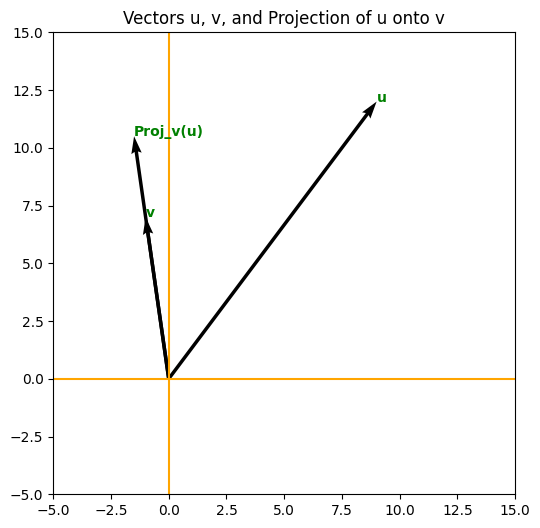

array([-1.5, 10.5])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# vectors
u = np.array([9,12])
v = np.array([-1,7])

# projection
scalar = np.dot(u,v) / np.dot(v,v)
proj = scalar * v

# plot
plt.figure(figsize=(6,6))
# plot vectors
plt.quiver(0,0,u[0],u[1],angles='xy',scale_units='xy',scale=1)
plt.quiver(0,0,v[0],v[1],angles='xy',scale_units='xy',scale=1)
plt.quiver(0,0,proj[0],proj[1],angles='xy',scale_units='xy',scale=1)

# labels
plt.text(u[0], u[1], "u", fontsize=10, fontweight="bold", color="green")
plt.text(v[0], v[1], "v", fontsize=10, fontweight="bold", color="green")
plt.text(proj[0], proj[1], "Proj_v(u)", fontsize=10, fontweight="bold", color="green")


# axes
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.axhline(0, color="orange"); plt.axvline(0, color="orange")
plt.gca().set_aspect('equal', 'box')
plt.title("Vectors u, v, and Projection of u onto v")
plt.show()

proj
